In [1]:
#Importing Libraries and Setting Defaults

import pandas as pd
import numpy as np
import matplotlib.pylab as plt  
from pandas import Grouper
import itertools

from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize']=15,6
rcParams['figure.dpi'] = 150

In [2]:
#Reading CSV dataset and filtering Kensington & Chelsea

dataset = pd.read_csv('HousePrice.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)
indexedDataset  =dataset.set_index(['Date'])
indexedDataset = pd.DataFrame(indexedDataset["Kensington & Chelsea"])

In [3]:
#Checking data types and index
indexedDataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 1995-01-01 to 2020-08-01
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Kensington & Chelsea  308 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


In [4]:
#Sample statistics for dataset
round(indexedDataset.describe(),2)

,Kensington & Chelsea
count,308.00
mean,755826.20
std,404193.56
min,182345.25
25%,411140.63
50%,719157.34
75%,1205281.60
max,1463377.92


In [5]:
#Viewing Data frame
round(indexedDataset,2)

,Kensington & Chelsea
Date,
1995-01-01,182694.83
1995-02-01,182345.25
1995-03-01,182878.82
1995-04-01,184176.92
1995-05-01,191474.11
...,...
2020-04-01,1348950.96
2020-05-01,1428515.77
2020-06-01,1285508.98


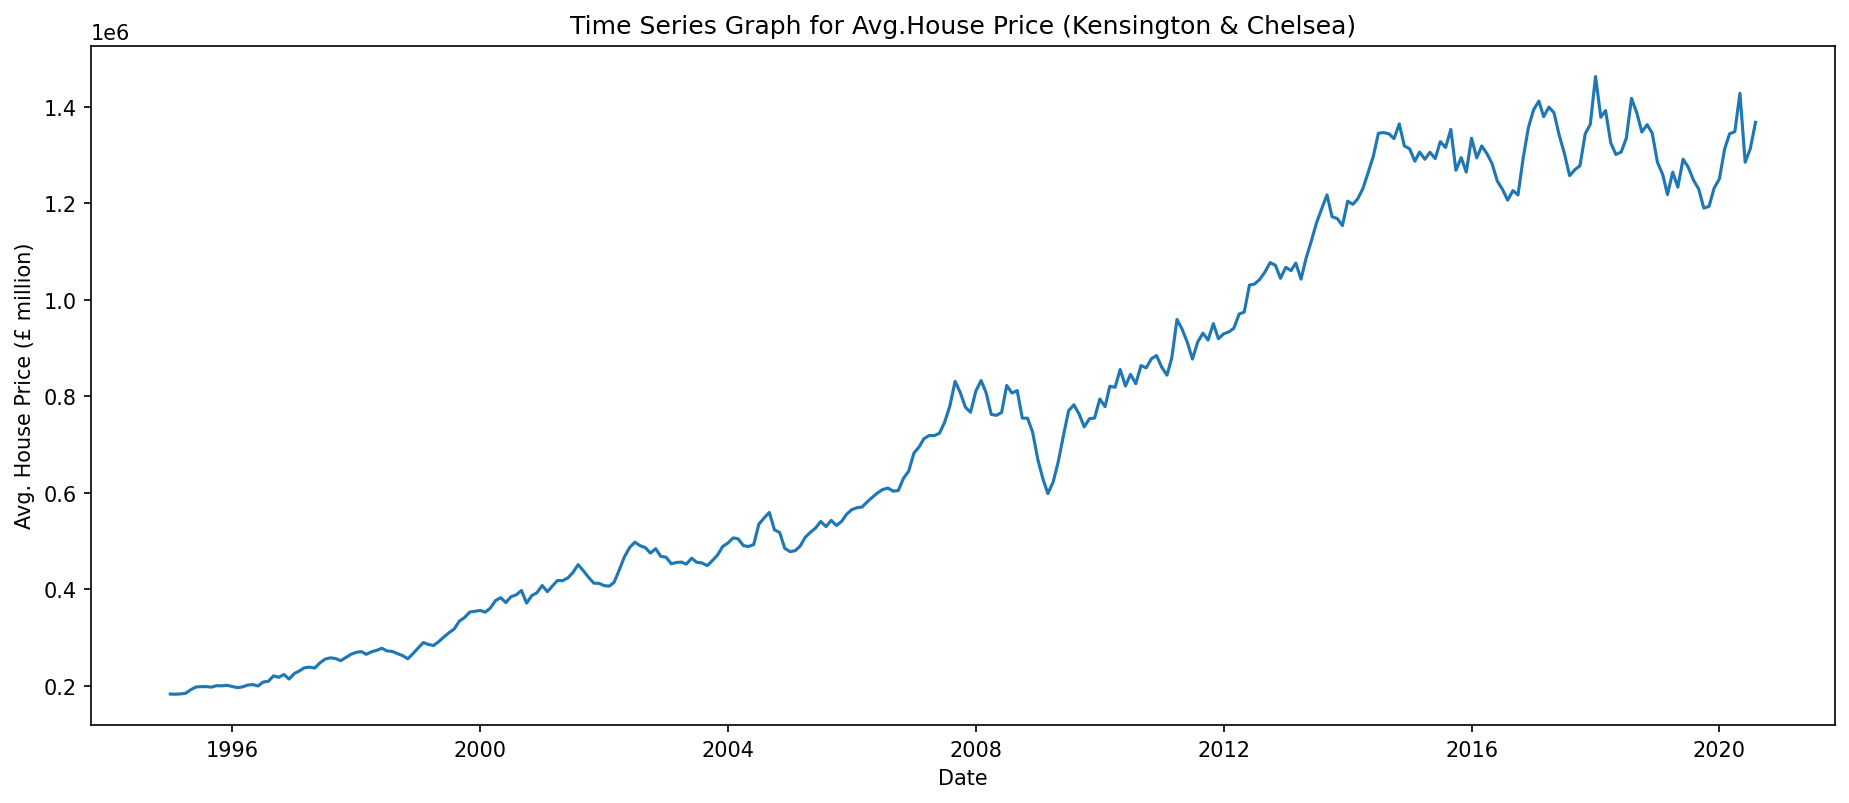

In [6]:
# Plotting Graph
plt.xlabel("Date")
plt.ylabel("Avg. House Price (£ million)")
plt.title('Time Series Graph for Avg.House Price (Kensington & Chelsea)')
plt.plot(indexedDataset)
plt.show(block=False)

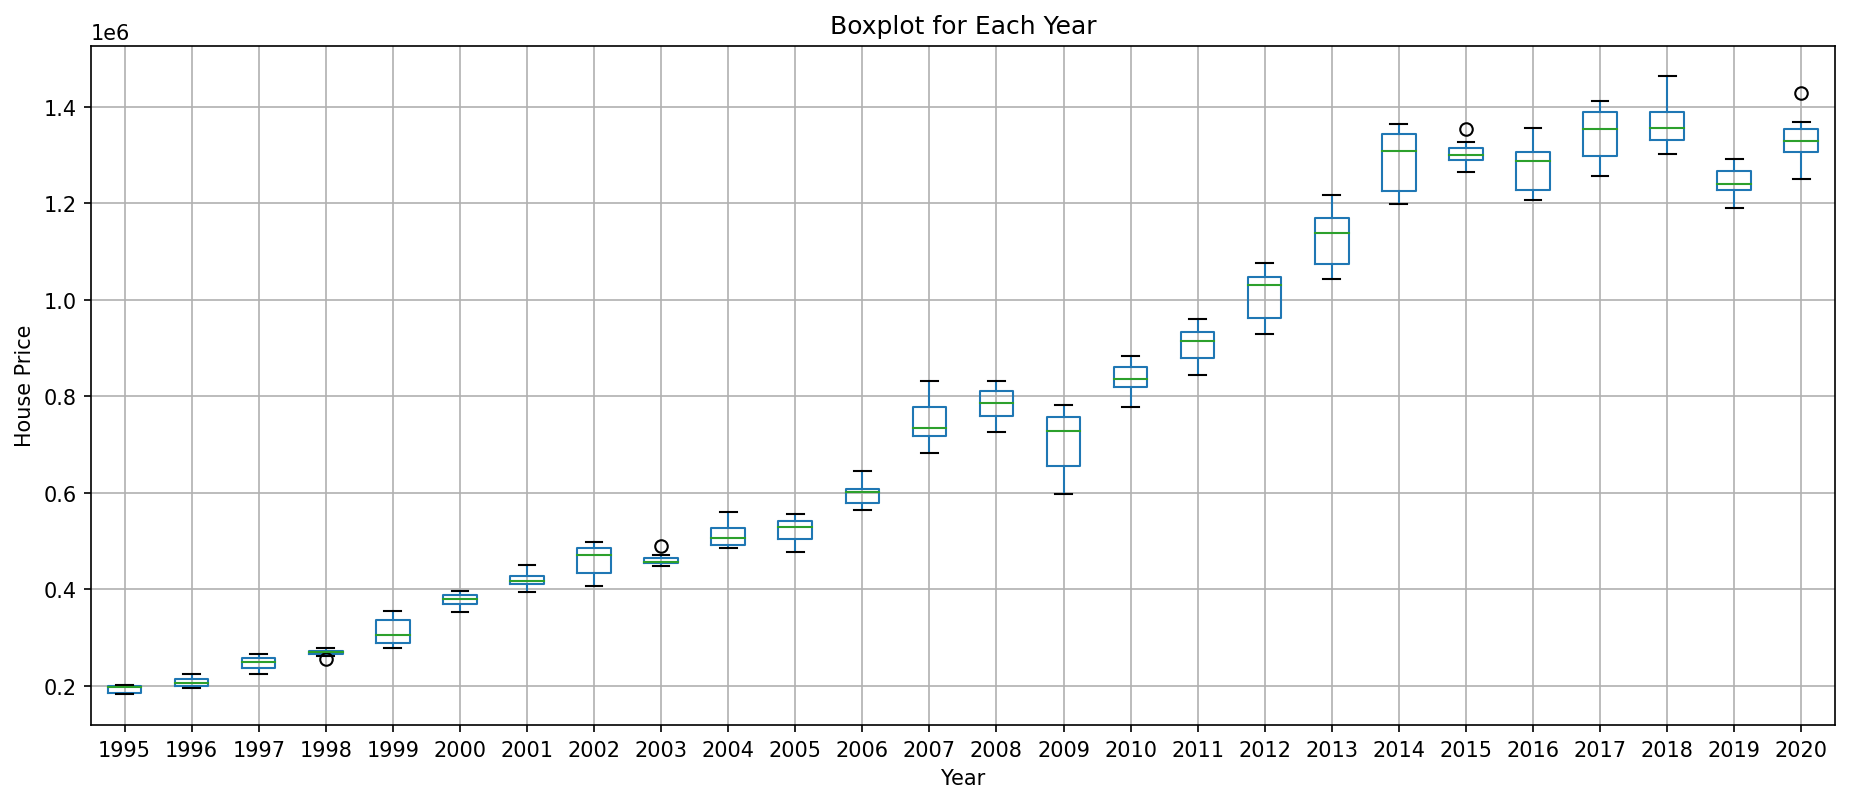

In [7]:
#Boxplot for each year
series = pd.read_csv('HousePrice.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series = pd.DataFrame(series["Kensington & Chelsea"])
groups = series.groupby(Grouper(freq='Y'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1995,2021)
plt.xlabel("Year")
plt.ylabel("House Price")
plt.title('Boxplot for Each Year')
months.boxplot()
plt.show()

In [8]:
# Determining Rolling Statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean.head(13))
print(rolstd.head(13))

            Kensington & Chelsea
Date                            
1995-01-01                   NaN
1995-02-01                   NaN
1995-03-01                   NaN
1995-04-01                   NaN
1995-05-01                   NaN
1995-06-01                   NaN
1995-07-01                   NaN
1995-08-01                   NaN
1995-09-01                   NaN
1995-10-01                   NaN
1995-11-01                   NaN
1995-12-01         192857.260633
1996-01-01         194158.681583
            Kensington & Chelsea
Date                            
1995-01-01                   NaN
1995-02-01                   NaN
1995-03-01                   NaN
1995-04-01                   NaN
1995-05-01                   NaN
1995-06-01                   NaN
1995-07-01                   NaN
1995-08-01                   NaN
1995-09-01                   NaN
1995-10-01                   NaN
1995-11-01                   NaN
1995-12-01           7627.391084
1996-01-01           7045.963750


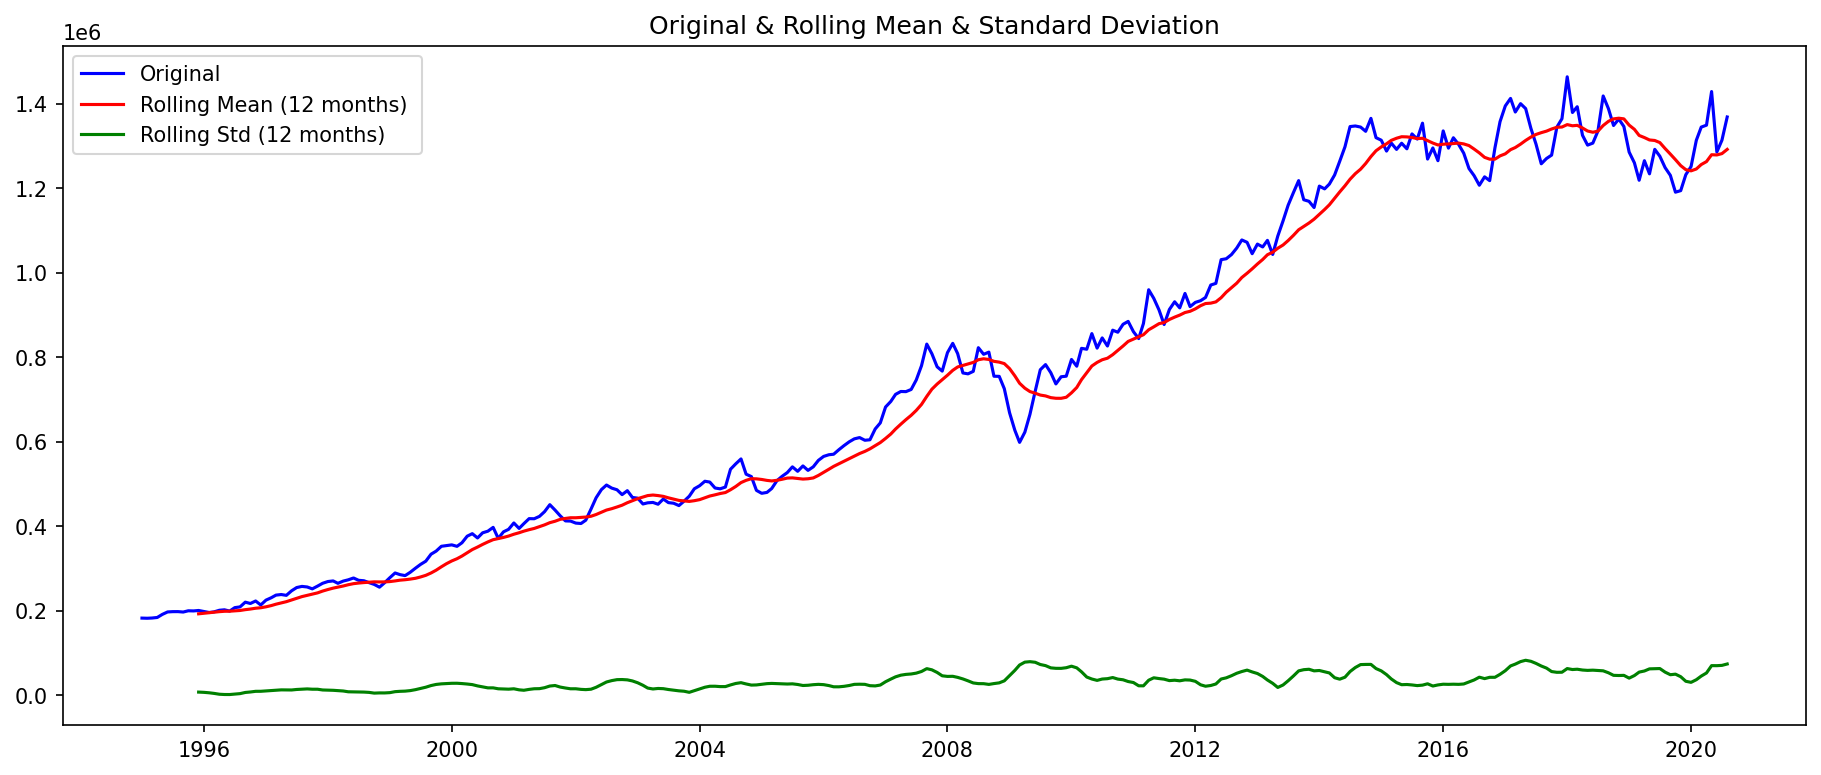

In [9]:
# Plot Rolling Statistics
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red',label="Rolling Mean (12 months) ")
std = plt.plot(rolstd, color='green',label="Rolling Std (12 months) ")
plt.legend(loc="best")
plt.title("Original & Rolling Mean & Standard Deviation")
plt.show(block=False)

In [10]:
#Function for Rolling Stats, Plot and Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red',label="Rolling Mean (12 months) ")
    std = plt.plot(rolstd, color='green',label="Rolling Std (12 months) ")
    plt.legend(loc='best')
    plt.title('Original & Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of ADF (Autoregressive Dickey Fuller) Test:')
    print ('Null Hypotesis: Time Series is Non-Stationary') 
    dftest = adfuller(timeseries, autolag='AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num of Lags : ", dftest[2])
    print("4. Num of Observations Used", dftest[3])
    print("5. Critical Values: ")
    for key,value in dftest[4].items():
        print("\t", key, ":",value)
    if dftest[0] < dftest[4]["5%"]:
        print("Reject Null Hypotesis - Time Series is Stationary")
    else:
        print("Failed to Reject Null Hypotesis - Time Series is Non-Stationary ")

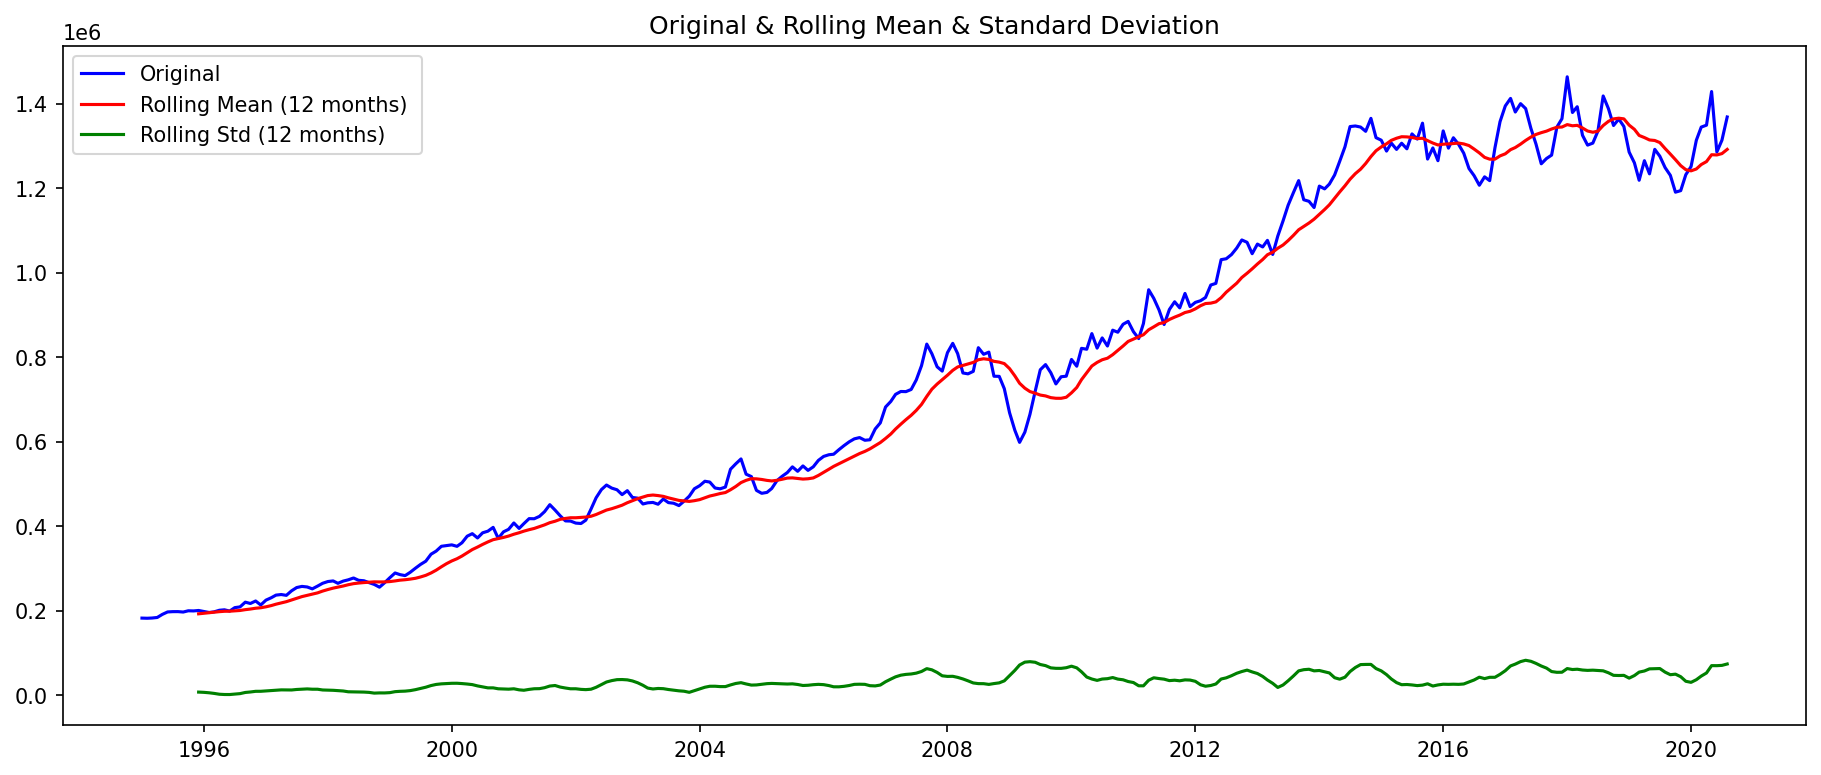

Results of ADF (Autoregressive Dickey Fuller) Test:
Null Hypotesis: Time Series is Non-Stationary
1. ADF :  -0.2551082293853533
2. P-Value :  0.9316260946379645
3. Num of Lags :  16
4. Num of Observations Used 291
5. Critical Values: 
	 1% : -3.4530232710482367
	 5% : -2.871523926671883
	 10% : -2.5720897694878424
Failed to Reject Null Hypotesis - Time Series is Non-Stationary 


In [11]:
#Perform for  Rolling Stats, Plot and Dickey-Fuller Test
test_stationarity(indexedDataset)

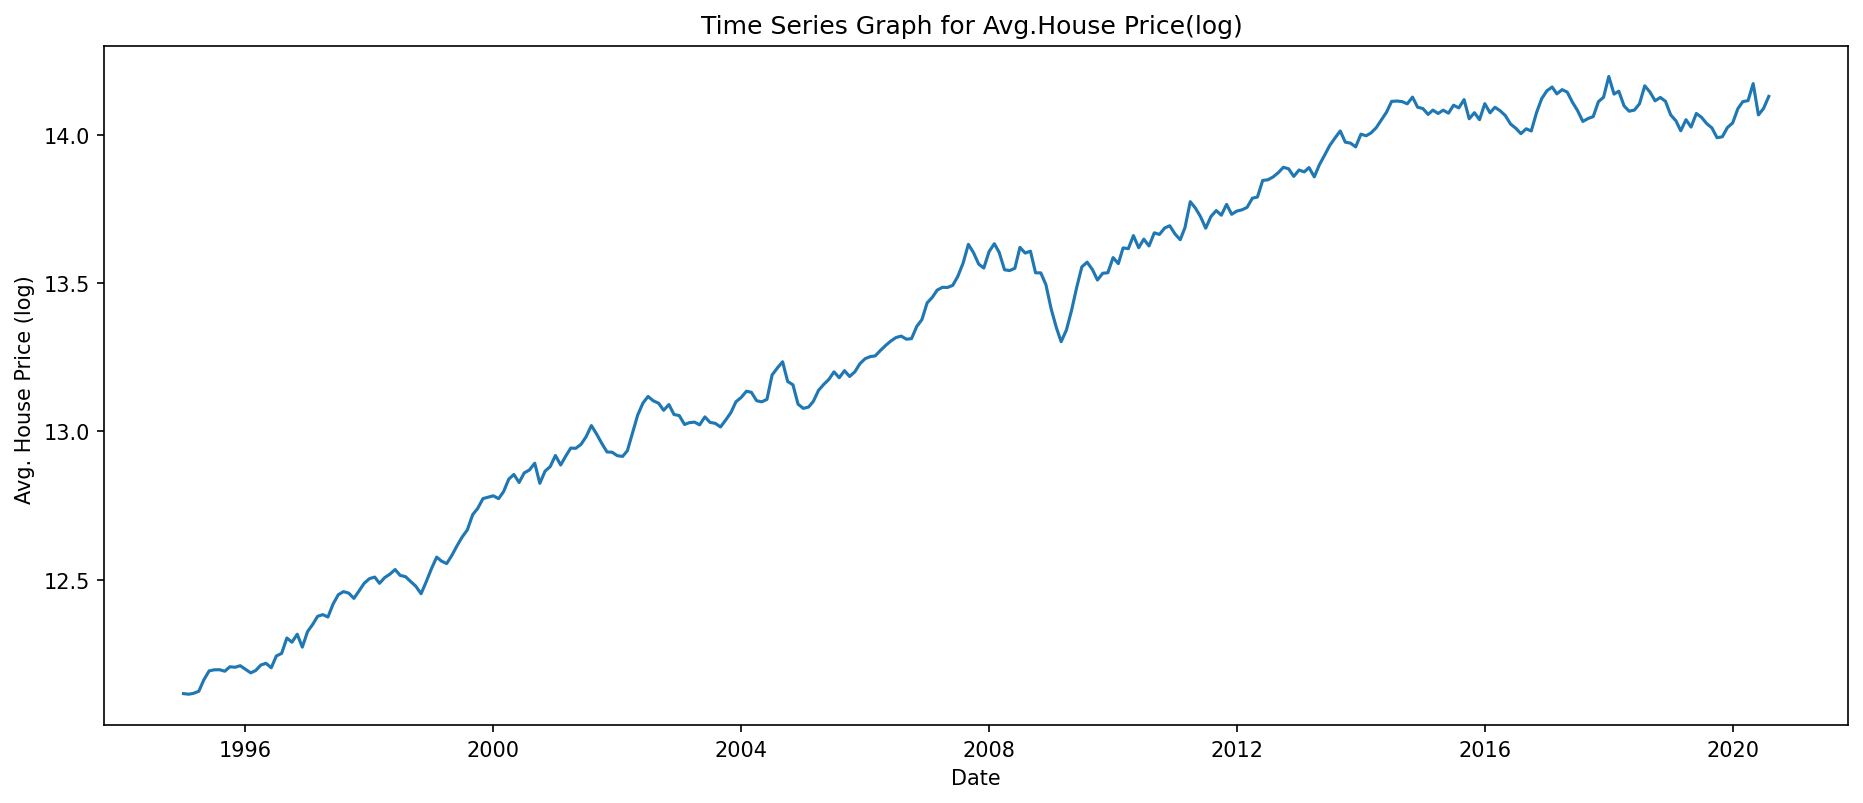

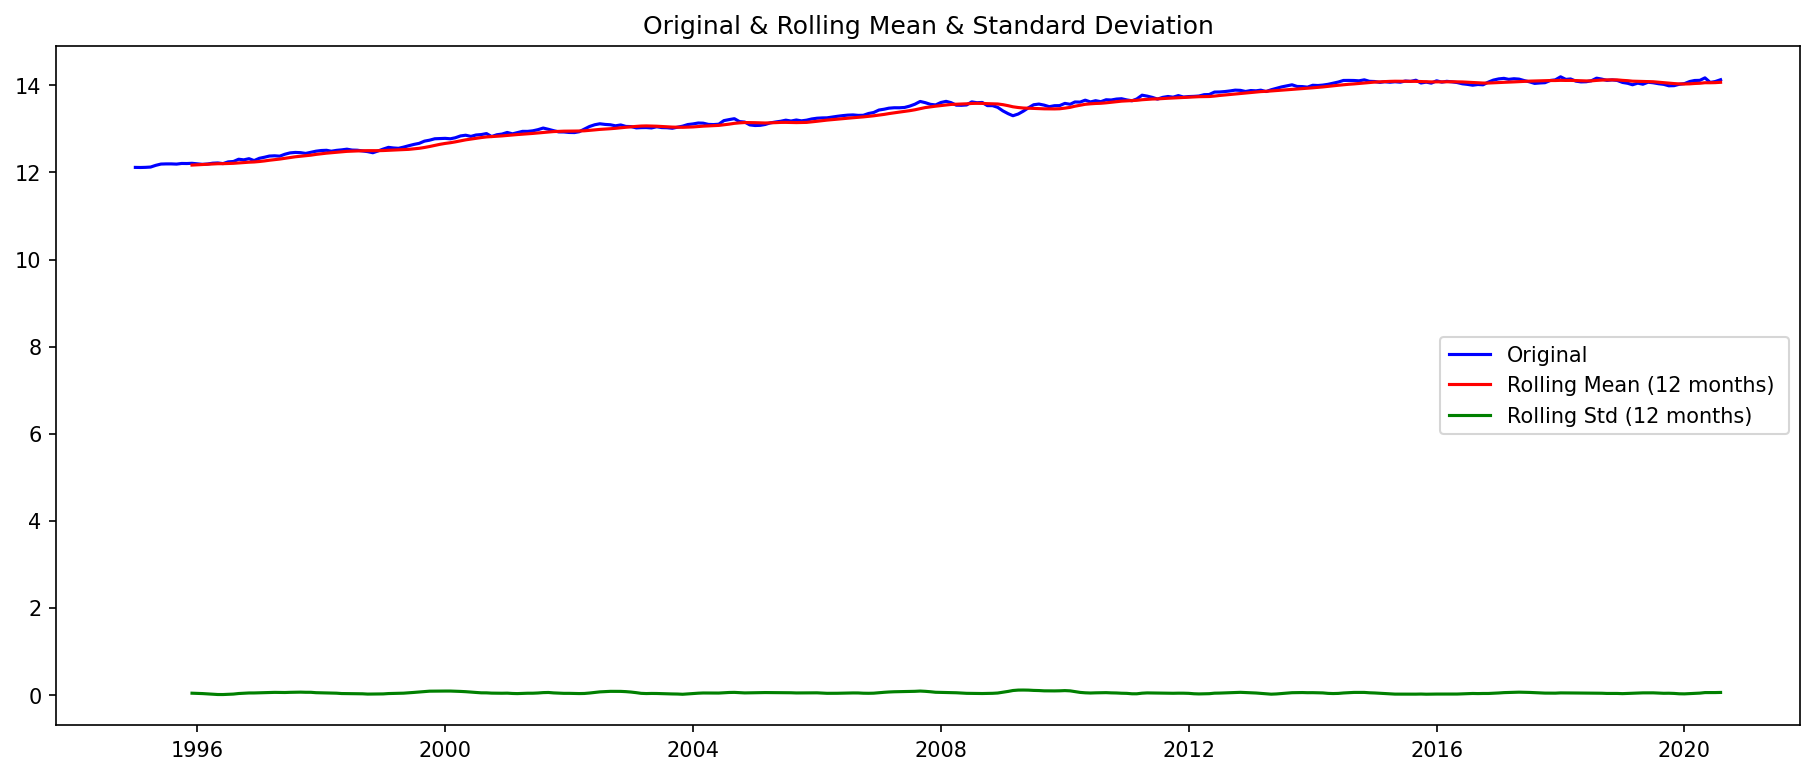

Results of ADF (Autoregressive Dickey Fuller) Test:
Null Hypotesis: Time Series is Non-Stationary
1. ADF :  -2.278267364160489
2. P-Value :  0.1790729991195673
3. Num of Lags :  15
4. Num of Observations Used 292
5. Critical Values: 
	 1% : -3.4529449243622383
	 5% : -2.871489553425686
	 10% : -2.572071437887033
Failed to Reject Null Hypotesis - Time Series is Non-Stationary 


In [12]:
#Calculating Log 
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)
plt.xlabel("Date")
plt.ylabel("Avg. House Price (log) ")
plt.title('Time Series Graph for Avg.House Price(log) ')
plt.show(block=False)

test_stationarity(indexedDataset_logScale)

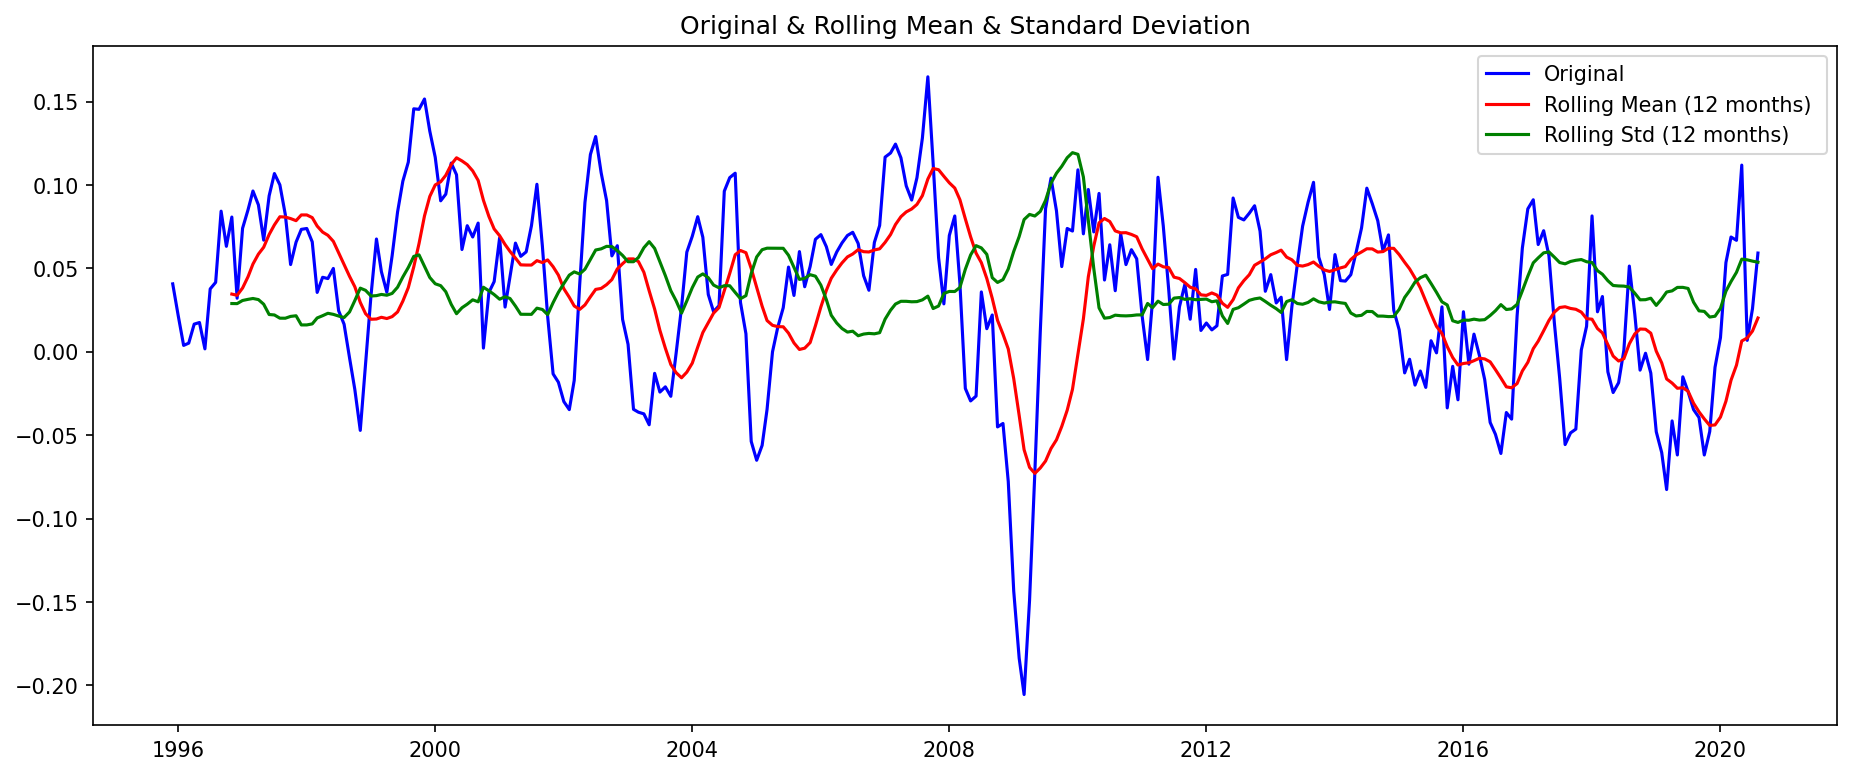

Results of ADF (Autoregressive Dickey Fuller) Test:
Null Hypotesis: Time Series is Non-Stationary
1. ADF :  -3.936232343626441
2. P-Value :  0.0017838007380964315
3. Num of Lags :  16
4. Num of Observations Used 280
5. Critical Values: 
	 1% : -3.453922368485787
	 5% : -2.871918329081633
	 10% : -2.5723001147959184
Reject Null Hypotesis - Time Series is Stationary


In [13]:
#Calculating Moving Average with Log Values and Differences
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
#Removing Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
test_stationarity(datasetLogScaleMinusMovingAverage)

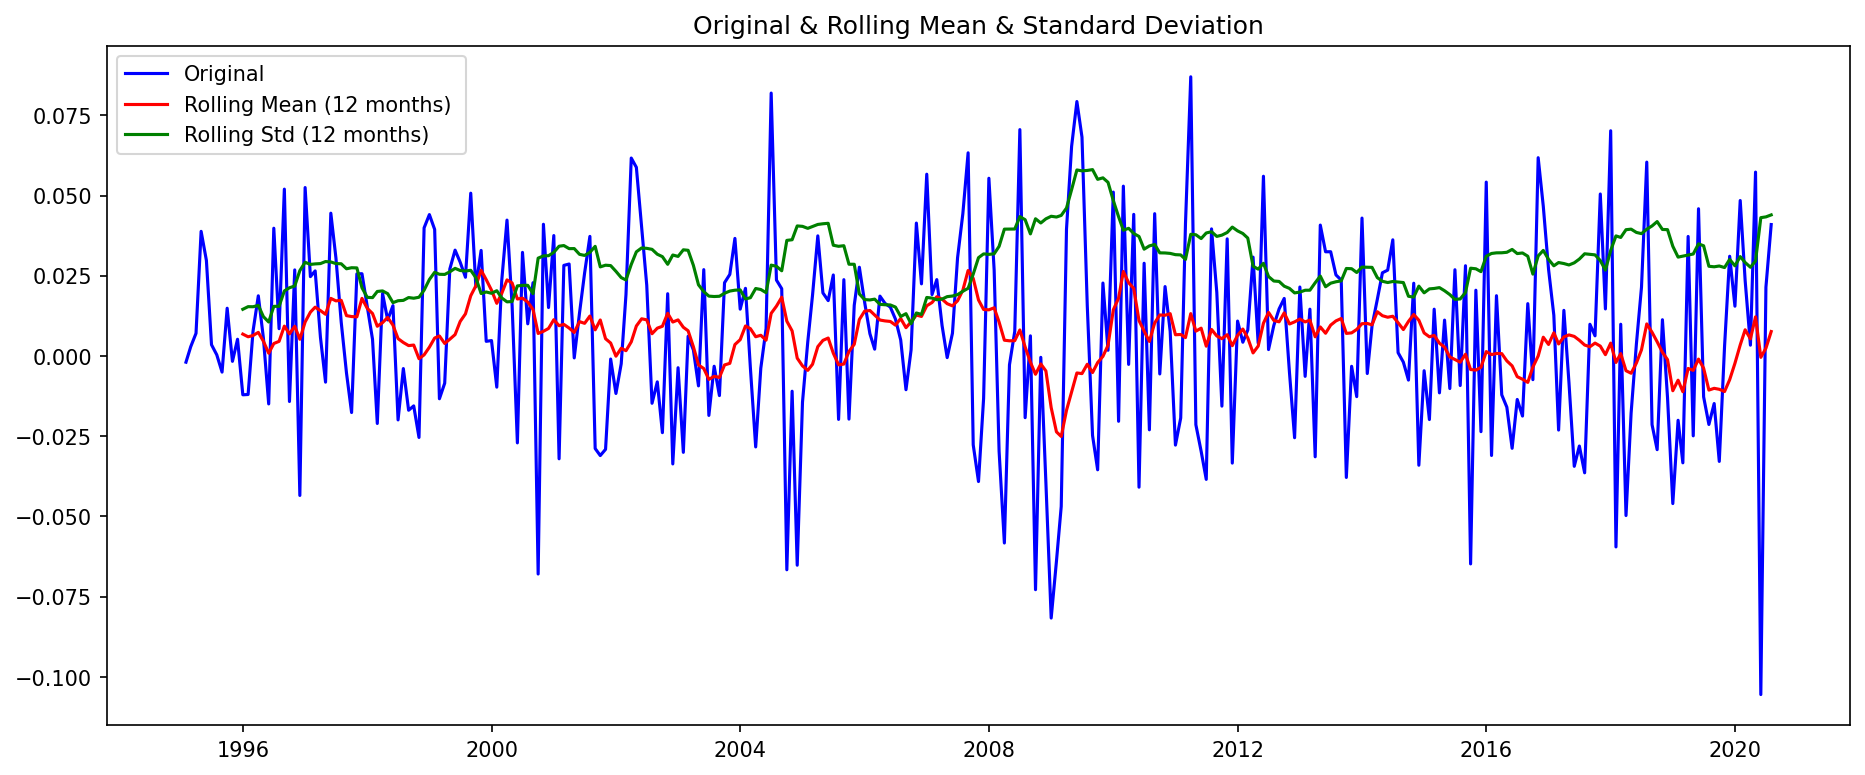

Results of ADF (Autoregressive Dickey Fuller) Test:
Null Hypotesis: Time Series is Non-Stationary
1. ADF :  -4.8072843570156625
2. P-Value :  5.266752187044494e-05
3. Num of Lags :  14
4. Num of Observations Used 292
5. Critical Values: 
	 1% : -3.4529449243622383
	 5% : -2.871489553425686
	 10% : -2.572071437887033
Reject Null Hypotesis - Time Series is Stationary


In [14]:
#Calculating difference with shift
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

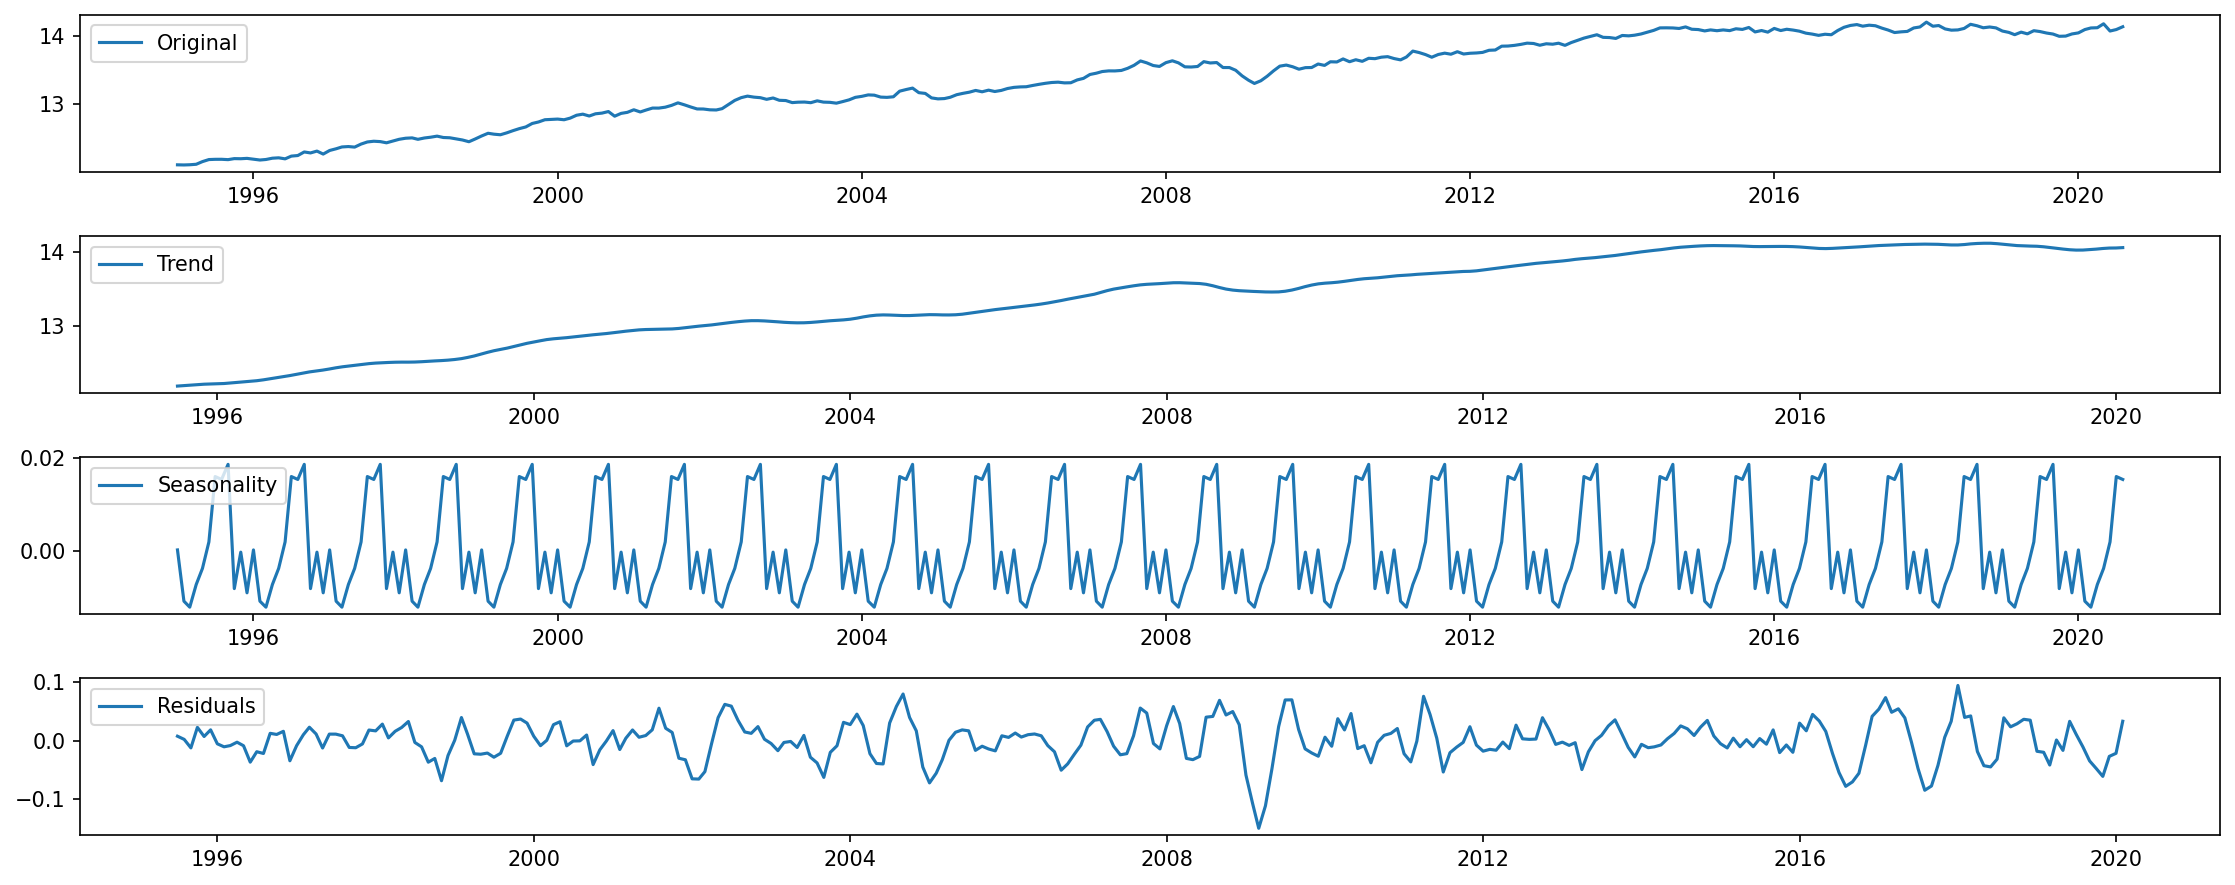

In [15]:
#Decomposition

decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

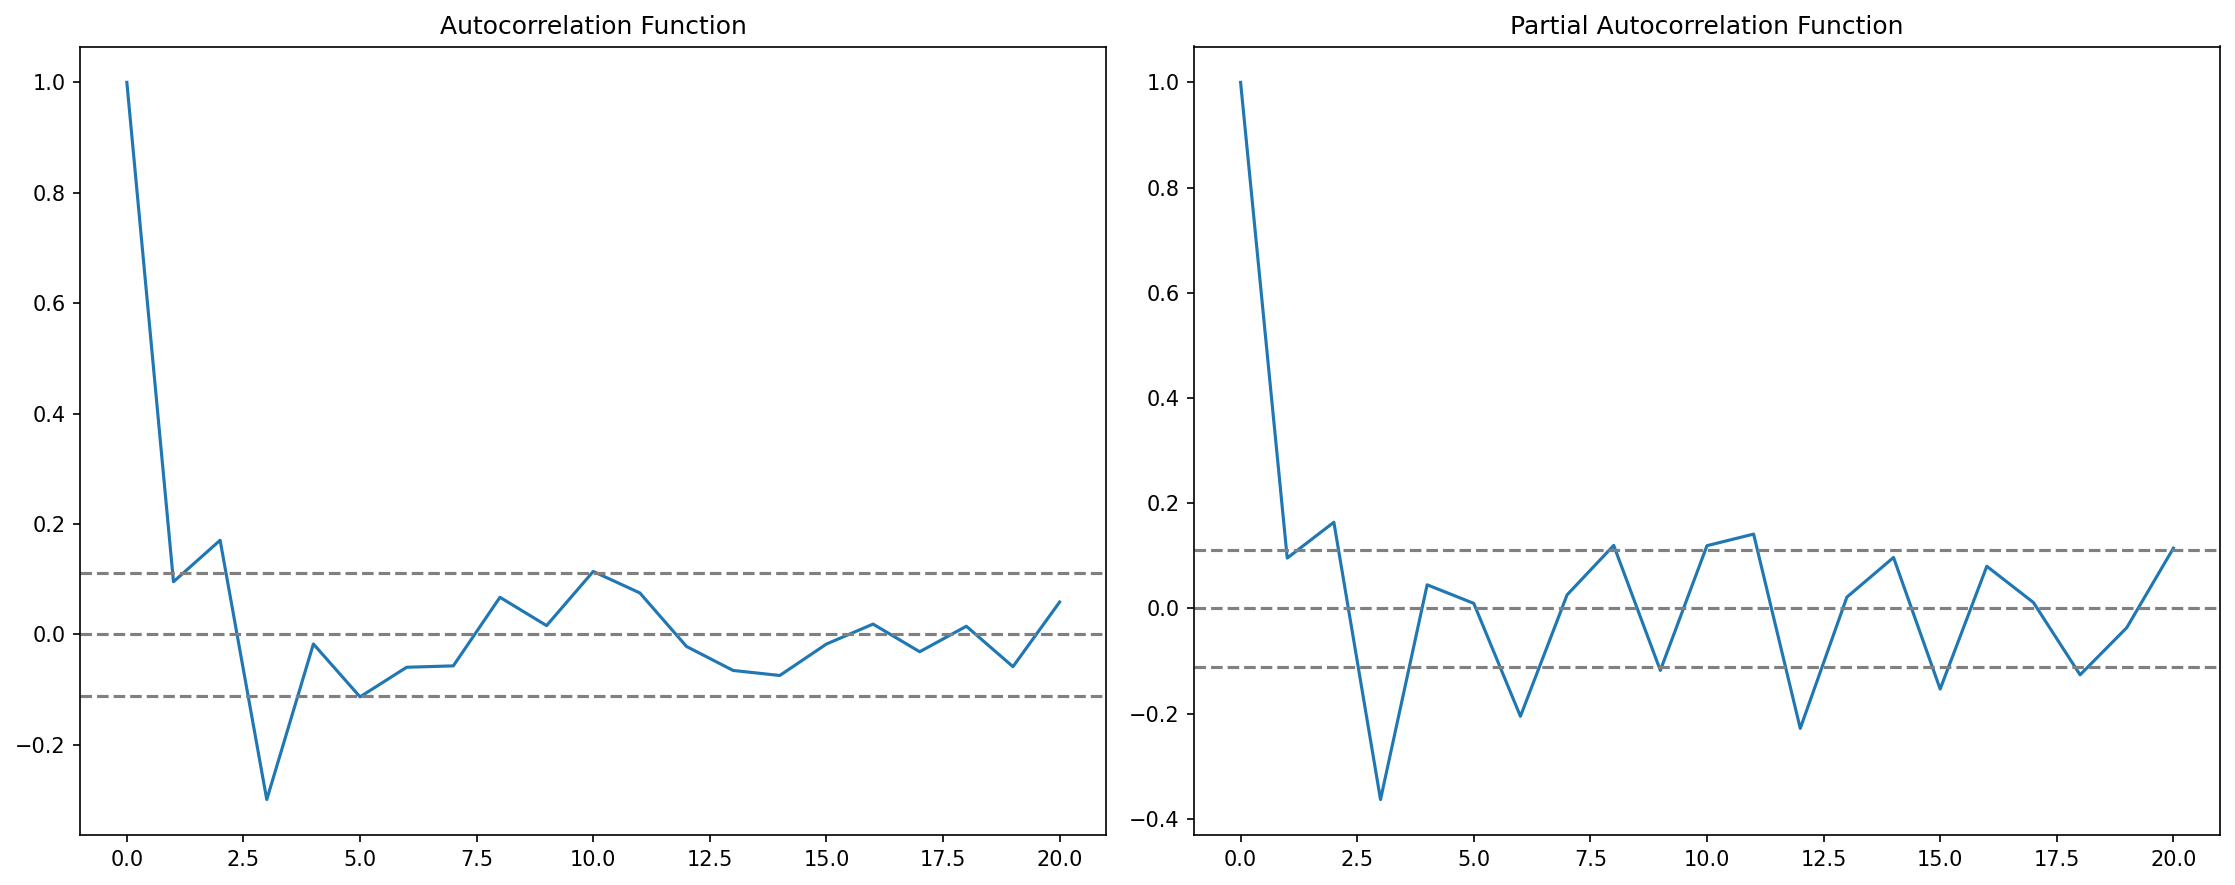

In [16]:
#ACF and PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

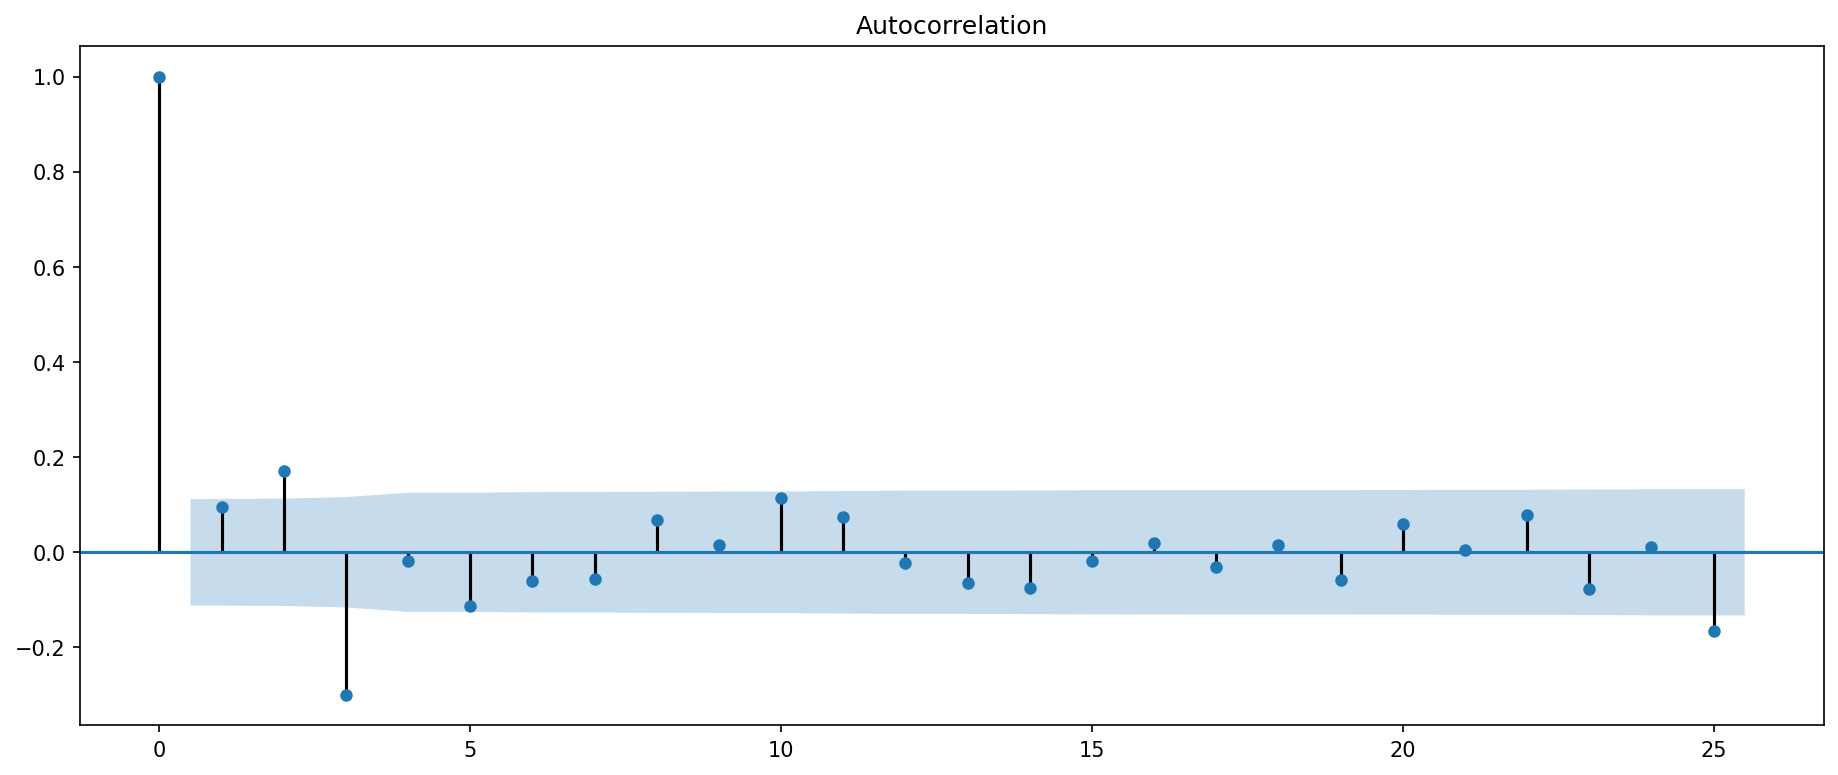

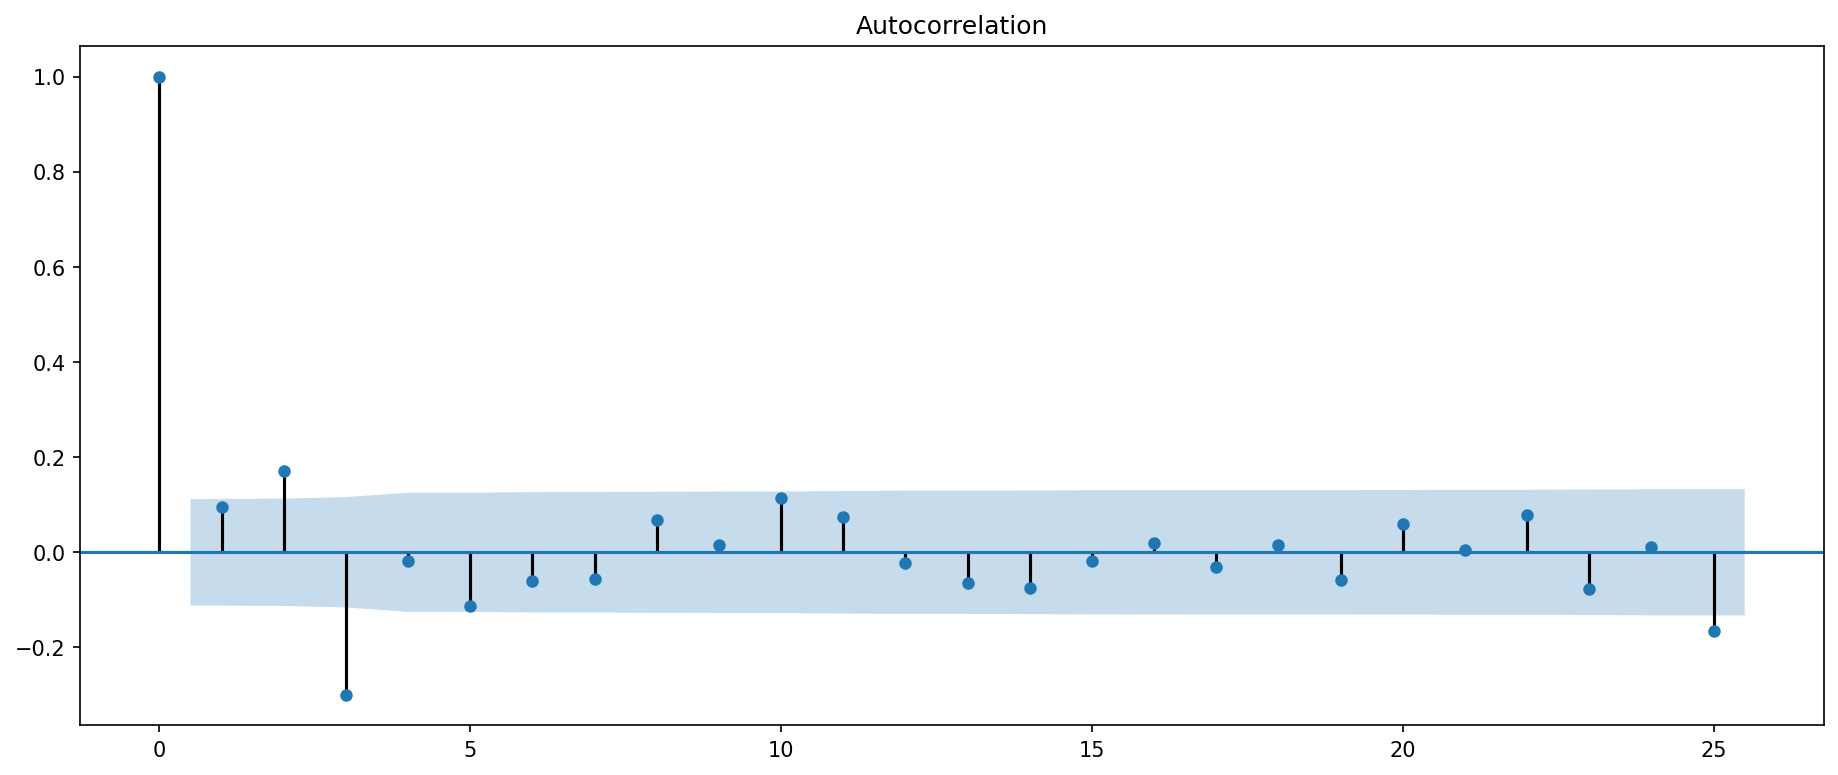

In [17]:
plot_acf(datasetLogDiffShifting)

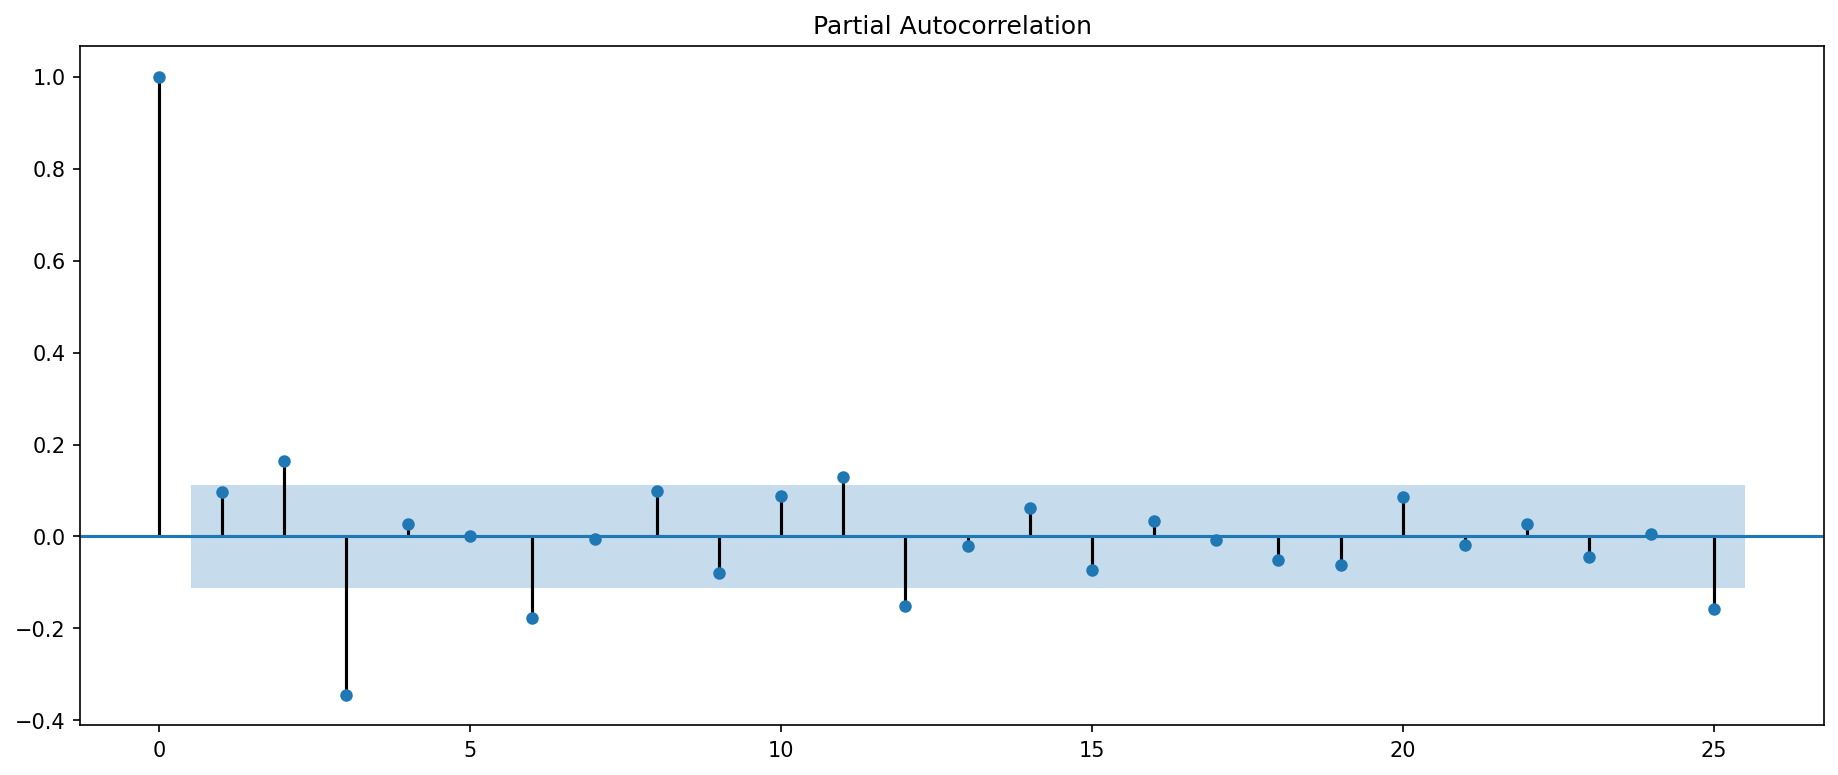

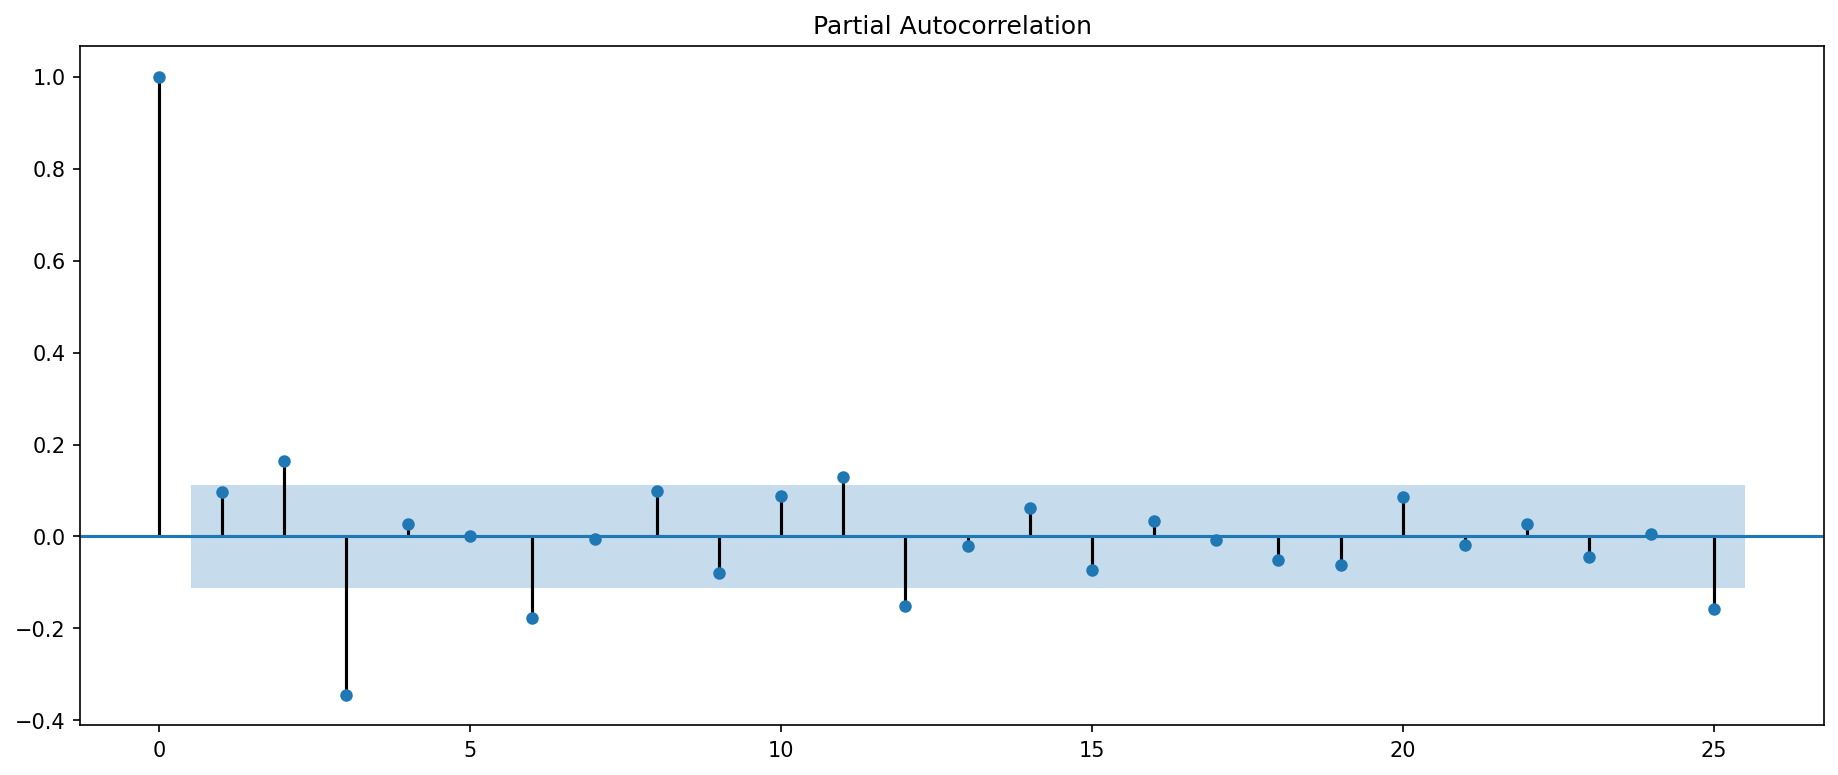

In [18]:
plot_pacf(datasetLogDiffShifting)

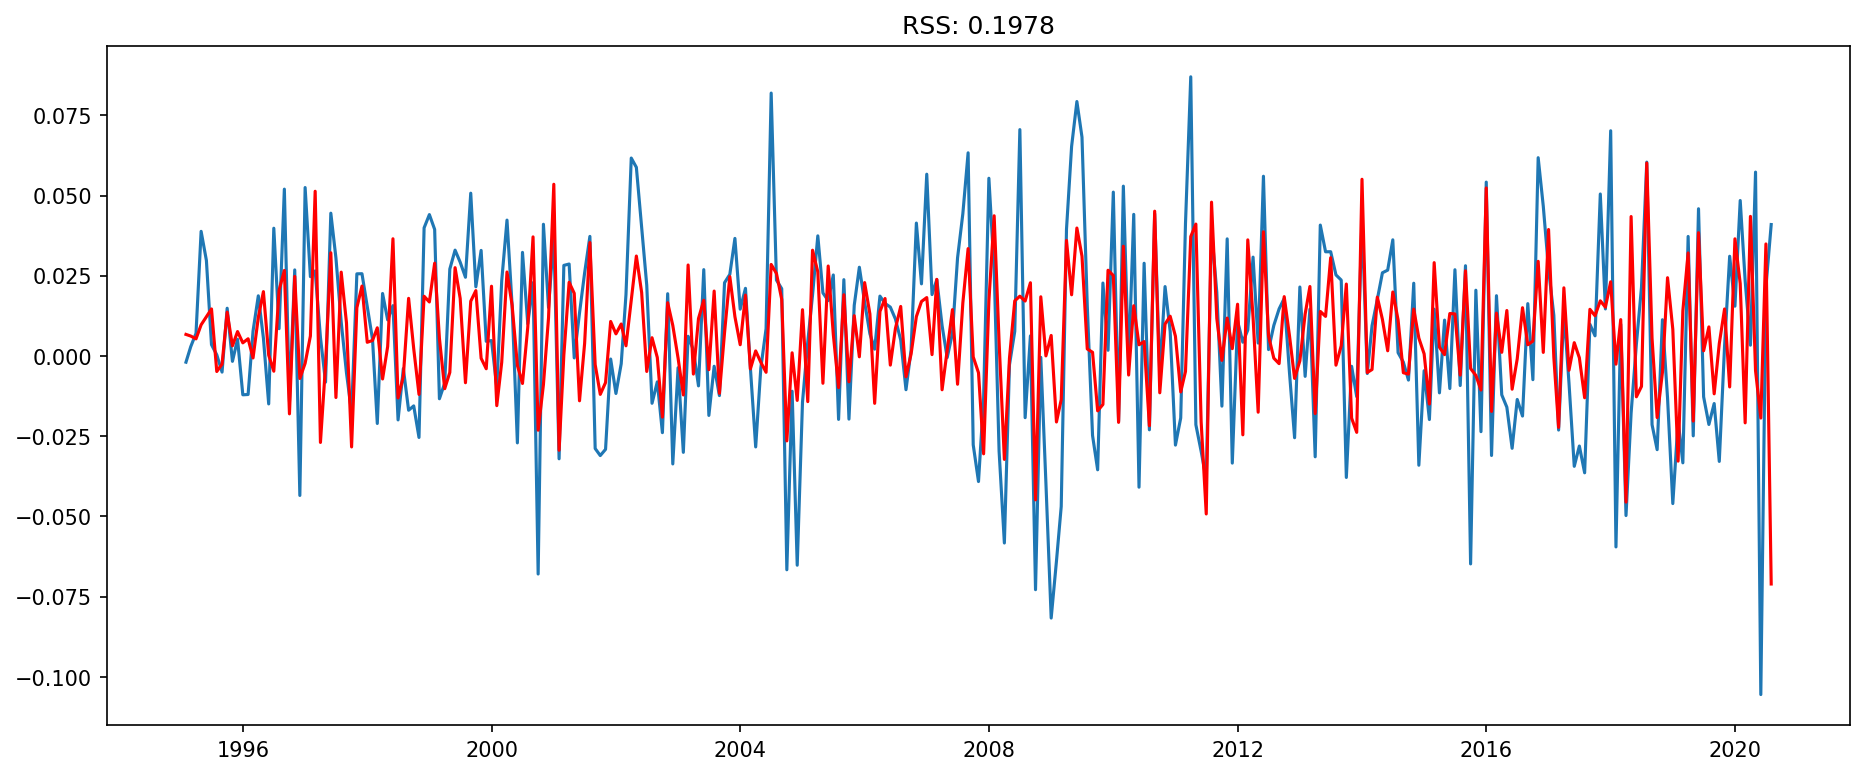

In [19]:
#The p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q). 

model = ARIMA(indexedDataset_logScale, order=(1, 1, 3))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues - datasetLogDiffShifting["Kensington & Chelsea"])**2))
plt.show()

In [21]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexedDataset_logScale,order=(1,1,3))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                                
==================================================================================
Dep. Variable:     D.Kensington & Chelsea   No. Observations:                  307
Model:                     ARIMA(1, 1, 3)   Log Likelihood                 690.494
Method:                           css-mle   S.D. of innovations              0.025
Date:                    Tue, 17 Nov 2020   AIC                          -1368.987
Time:                            00:06:25   BIC                          -1346.626
Sample:                        02-01-1995   HQIC                         -1360.045
                             - 08-01-2020                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0067      0.002      4.460      0.000       0.004       0.010
ar.L1.D.Kensington & Chelsea    -0.0660      0.094     -0.705      0.481      -0.249       0.117
ma.L1.D.Kensington & Chelsea     0.3317      0.073      4.534      0.000       0.188       0.475
ma.L2.D.Kensington & Chelsea     0.3993      0.079      5.076      0.000       0.245       0.553
ma.L3.D.Kensington & Chelsea    -0.6149      0.088     -6.950      0.000      -0.788      -0.442
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -15.1495           +0.0000j           15.1495            0.5000
MA.1           -0.4808           -0.8823j            1.0047           -0.3294
MA.2           -0.4808           +0.8823j            1.0047            0.3294
MA.3            1.6109           -0.0000j            1.6109           -0.0000
-----------------------------------------------------------------------------
"""

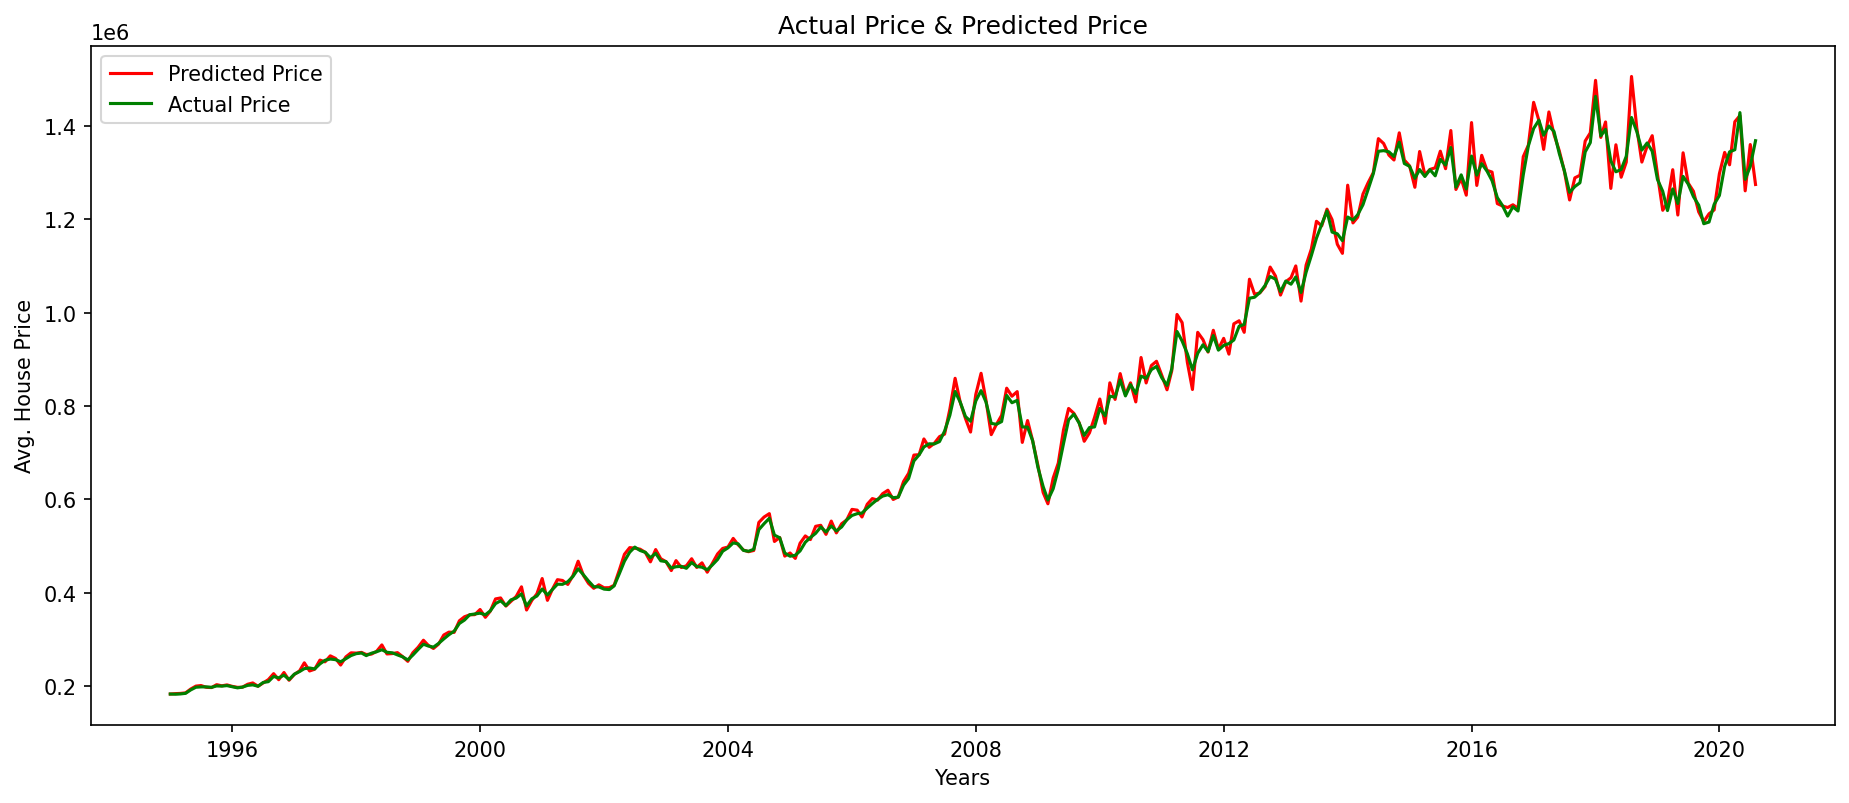

In [22]:
#Predictions
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_log = pd.Series(indexedDataset_logScale["Kensington & Chelsea"].iloc[0:], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)

#Plotting
plt.plot(predictions_ARIMA,color="red",label="Predicted Price")
plt.plot(indexedDataset, color="green", label="Actual Price")
plt.legend(loc='best')
plt.title('Actual Price & Predicted Price')
plt.xlabel("Years")
plt.ylabel("Avg. House Price")
plt.show()

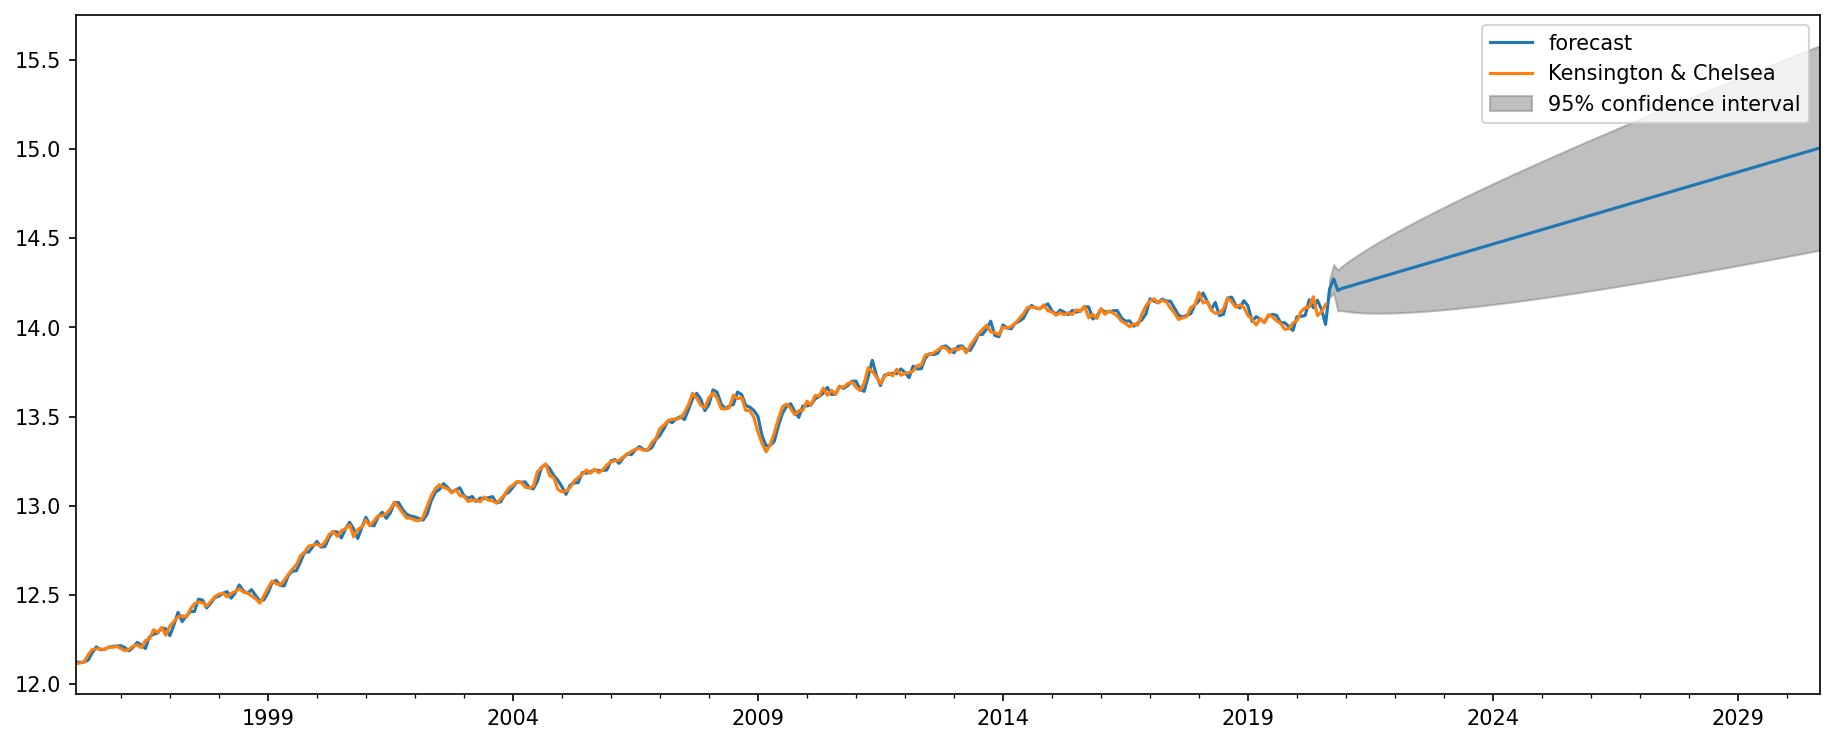

In [23]:
#Forecasting Graph
results_ARIMA.plot_predict(1,428)
x= results_ARIMA.forecast(steps=120)

In [27]:
#Forecasting
forecasting = pd.DataFrame(np.exp(x[0]))
forecasting["Predicted_Price"] = forecasting[0]
forecasting.index=pd.date_range(start='9/2020', end='9/2030', freq='M').strftime('%Y-%b')
forecasting = pd.DataFrame(round(forecasting["Predicted_Price"],2))
forecasting
#forecasting.loc["2025-Jul"]

,Predicted_Price
2020-Sep,1496023.75
2020-Oct,1579518.41
2020-Nov,1479702.11
2020-Dec,1496807.76
2021-Jan,1506457.51
...,...
2030-Apr,3183303.18
2030-May,3204831.09
2030-Jun,3226504.58
2030-Jul,3248324.65


In [41]:
#Predictions for 2025 
print(forecasting[52:64].mean())
forecasting[52:64]

Predicted_Price    2161150.08
dtype: float64


,Predicted_Price
2025-Jan,2081939.50
2025-Feb,2096019.15
2025-Mar,2110194.02
2025-Apr,2124464.75
2025-May,2138831.99
2025-Jun,2153296.39
2025-Jul,2167858.61
2025-Aug,2182519.31
2025-Sep,2197279.15
2025-Oct,2212138.82


In [26]:
predictions_ARIMA.size

308